In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("Zomato data .csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [8]:
def handlerate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)
df['rate']=df['rate'].apply(handlerate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## Types Of Resturant

Text(0.5, 0, 'Types of Resturant')

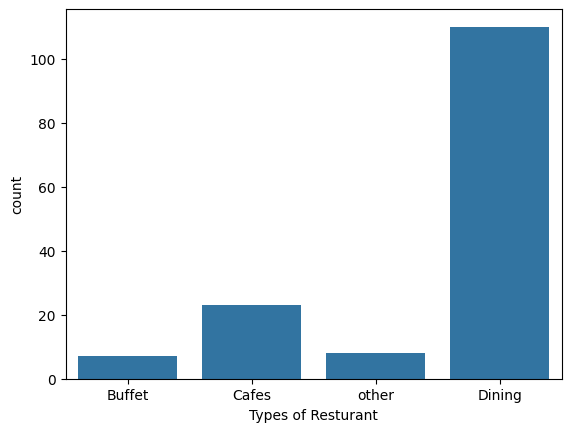

In [13]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Types of Resturant")

Text(0, 0.5, 'Votes')

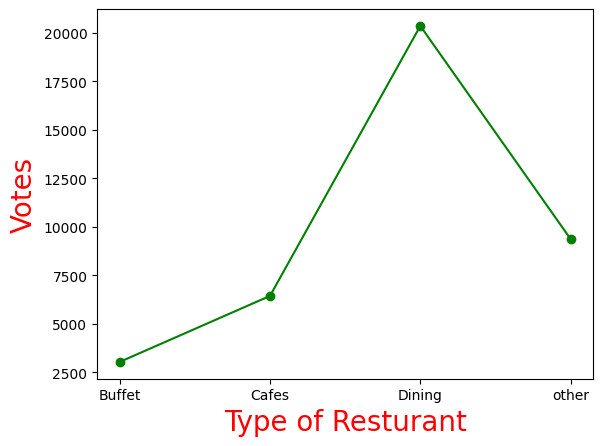

In [17]:
grouped_data=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c="green",marker="o")
plt.xlabel("Type of Resturant",c="red",size=20)
plt.ylabel("Votes",c="red",size=20)

## Ratingss of the resturant

<function matplotlib.pyplot.show(close=None, block=None)>

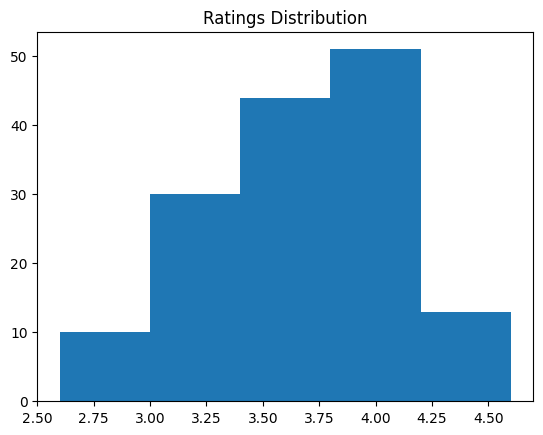

In [20]:
plt.hist(df['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show

## Couples Rating

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

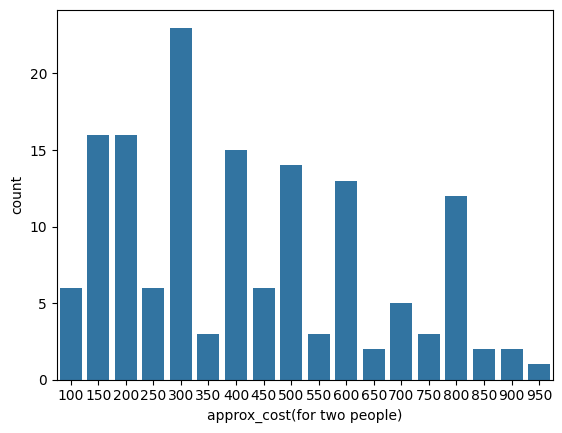

In [23]:
data=df['approx_cost(for two people)']
sns.countplot(x=data)

## wheather online orders recieve higher rating than offline

<Axes: xlabel='online_order', ylabel='rate'>

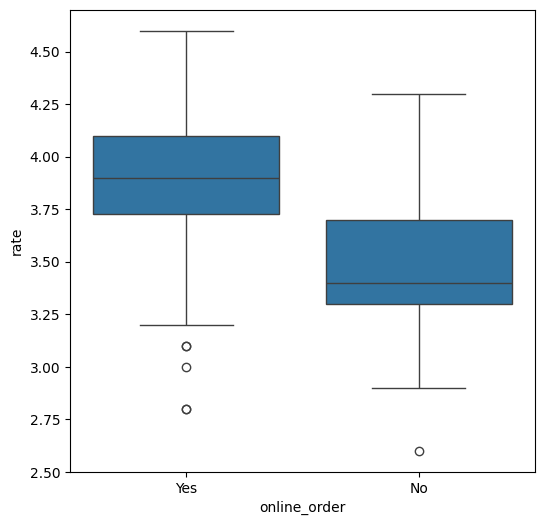

In [26]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)

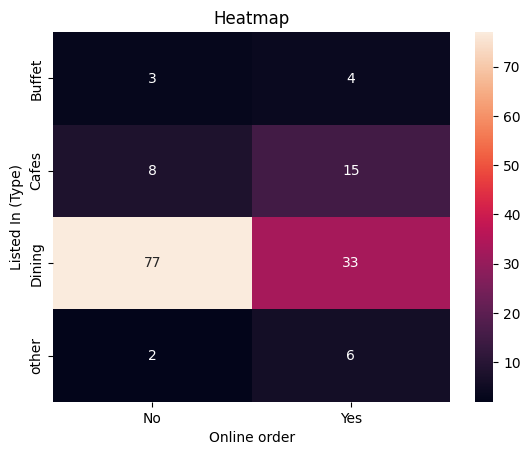

In [34]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,fmt='d')
plt.title("Heatmap")
plt.xlabel("Online order")
plt.ylabel("Listed In (Type)")
plt.show()